# 특성 공학과 규제

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import pandas as pd # 데이터프레임, cvs 관리

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy() # datafame을 numpy 배열로
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [3]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) # 농어 무게

In [4]:
from sklearn.model_selection import train_test_split # 훈련 세트와 테스트 세트 분리

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기

In [5]:
from sklearn.preprocessing import PolynomialFeatures # 다항회귀

In [6]:
poly = PolynomialFeatures() # 변환기 객체는 훈련 세트를 이용해 fit한 후 transform하는 동일한 메서드로 구성
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [7]:
poly = PolynomialFeatures(include_bias=False) # include_bias=False : 절편 값인 1을 변환기에서 제거, 제거하지 않아도 모델 훈련 시 자동으로 모델에 있는 절편 값이 사용됨
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [8]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [9]:
print(train_poly.shape) # 특성이 3개에서 9개로 증가하였음

(42, 9)


In [10]:
poly.get_feature_names_out() # 각각 특성끼리의 곱과 각 특성의 제곱이 새 특성으로 추가됨을 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [11]:
test_poly = poly.transform(test_input) # 이 문제에서는 괜찮지만 변환기를 fit할때는 훈련 세트를 이용, 그것으로 테스트 세트를 transform

## 다중 회귀 모델 훈련하기

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [13]:
print(lr.score(test_poly, test_target)) # 과소적합 해결, 많은 특성을 추가하는 것으로 복잡한 모델을 만들 수 있음

0.9714559911594134


In [14]:
poly = PolynomialFeatures(degree=5, include_bias=False) # 5차까지 특성을 추가, 기본값은 2로 추정

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [15]:
print(train_poly.shape) # 55개의 특성

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [ ]:
print(lr.score(test_poly, test_target))

-144.40579242684848


과대적합 되어있음을 확인

## 규제

In [16]:
from sklearn.preprocessing import StandardScaler # 릿지 또는 라쏘를 적용하기 전에 스케일을 맞춰줄 것

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지

In [17]:
from sklearn.linear_model import Ridge # 릿지 = 잔차제곱합 + 패널티 항

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [18]:
print(ridge.score(test_scaled, test_target))

0.9790693977615397


In [19]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [20]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 릿지의 가장 알맞은 파라미터 alpha 찾기
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

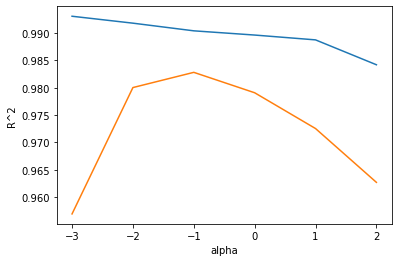

In [21]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

alpha의 log값이 -1일 때 훈련 세트와 테스트 세트의 점수 차가 가장 적으며 이때의 파라미터가 모델에 가장 알맞다고 할 수 있음

In [23]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


## 라쏘

In [24]:
from sklearn.linear_model import Lasso # 가중치들의 절댓값의 합이 최소가 되게 하는 규제

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [25]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [30]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.263e+03, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


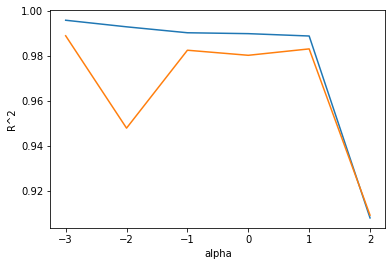

In [31]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

alpha의 log값이 1일 때 훈련 세트와 테스트 세트의 점수 차가 가장 적으며 이때의 파라미터가 모델에 가장 알맞다고 할 수 있음

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))

40


라쏘는 릿지와 다르게 항들의 계수를 0으로 만들 수 있는 강력한 규제이며, 이 경우 55개의 특성 중 40개의 항이 0이 되었음을 알 수 있다. 이를 통해 훈련 시 중요한 특성이 무엇인지를 알아보는 데 사용할 수도 있다.